**Fonte dos dados:** https://www.kaggle.com/datasets/ahmedezzatibrahem/e-commerce/data

**Contexto:** O conjunto de dados refere-se a informações detalhadas sobre transações e interações em um ambiente de comércio eletrônico. Estes dados permitem construir modelos preditivos ou análises para entender o comportamento do cliente, segmentação de mercado e otimização de estratégias de marketing.

Este conjunto de dados cativou-nos por ser relevante no contexto atual, fornecendo uma visão detalhada sobre o comportamento do consumidor em plataformas digitais, cobrindo diversos aspectos das transações e interações.

**Conteúdo:**
O dataset é composto por múltiplas variáveis e um total de 1000 registros, o que permite uma análise representativa. As variáveis são:

* `customer_id` - o identificador único de cada cliente;
* `join_date` - a data de registo do cliente no sistema;
* `city_id` - a identificação da cidade de origem do cliente;
* `gender_id` - o género do cliente;

**OBJETIVO:**

A escolha deste dataset justifica-se pelo interesse em explorar dados relacionados ao comportamento do cliente em plataformas de comércio eletrônico, analisando como diferentes fatores podem influenciar as compras e interações dos consumidores. Além disso, a diversidade das variáveis proporciona uma oportunidade de aplicar técnicas analíticas variadas, o que torna o trabalho mais completo e enriquecedor.

## 1. Preâmbulo

O preâmbulo consiste na importação das bibliotecas e módulos necessários para a realização das análises e tarefas deste projeto. As ferramentas escolhidas permitem manipular dados, realizar imputação, avaliar métricas de desempenho, aplicar técnicas de *clustering* e produzir visualizações.

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importação dos dados

Nesta etapa, realizamos a importação do *dataset* ao utilizarmos a biblioteca `pandas`. O ficheiro em formato *Excel*, denominado **E-commerce_data**, contém os dados que serão analisados ao longo do projeto.

In [11]:
# Aqui carregamos o dataset e analisamos a sua estrutura para garantir que os dados sejam adequados para a análise.
df = pd.read_excel("E-commerce_data.xlsx")

## 3. Primeira inspeção dos dados, correção de formatos e início da limpeza

Na etapa 3, vamos realizar uma análise inicial do *dataset*, esta análise inclui:

1. **Inspeção dos Dados;**
2. **Verificação de Estrutura;**
3. **Estatísticas Descritivas;**
4. **Valores Ausentes.**

Esta etapa vai estabelece uma base sólida para a limpeza e preparação dos dados para análises mais detalhadas.

In [16]:
df

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1
...,...,...,...,...
995,996,2022-10-28,3,1
996,997,2022-07-07,20,2
997,998,2024-03-09,11,2
998,999,2022-07-16,6,1


In [18]:
# Exibição das primeiras linhas do dataset
print("Primeiras linhas do dataset original:")
print(df.head())

Primeiras linhas do dataset original:
   customer_id  join_date  city_id  gender_id
0            1 2022-01-08        7          1
1            2 2023-05-02       20          2
2            3 2023-05-14       15          1
3            4 2022-11-25       11          2
4            5 2023-04-26        8          1


In [20]:
# Informações gerais do dataset
print("\nInformações gerais do dataset:")
print(df.info())


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1000 non-null   int64         
 1   join_date    1000 non-null   datetime64[ns]
 2   city_id      1000 non-null   int64         
 3   gender_id    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB
None


In [22]:
# Estatísticas descritivas
print("\nEstatísticas descritivas do dataset:")
print(df.describe())


Estatísticas descritivas do dataset:
       customer_id                   join_date      city_id    gender_id
count  1000.000000                        1000  1000.000000  1000.000000
mean    500.500000  2023-01-15 07:29:16.800000    10.136000     1.491000
min       1.000000         2021-07-18 00:00:00     1.000000     1.000000
25%     250.750000         2022-04-08 18:00:00     5.000000     1.000000
50%     500.500000         2023-01-05 12:00:00    10.000000     1.000000
75%     750.250000         2023-10-27 00:00:00    15.000000     2.000000
max    1000.000000         2024-07-13 00:00:00    20.000000     2.000000
std     288.819436                         NaN     5.895953     0.500169


In [24]:
# Verificação de valores ausentes por coluna
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
customer_id    0
join_date      0
city_id        0
gender_id      0
dtype: int64


**Comentários:**

*  **Análise inicial do *Dataset* `df`:**

1. **Valores ausentes**:
   Apesar dos dados estarem consideravelmente limpos, verificou-se que não existem valores ausentes nas variáveis (`customer_id`, `join_date`, `city_id`, `gender_id`). Assim sendo, este ponto elimina a necessidade do tratamento inicial dos valores nulos.
2. **Distribuição e inconsistências:**
   *  `city_id`: A distribuição de ID's das cidades é relativamente uniforme, o que sugere que o impacto do local nas análises poderá ser equilibrado.
   *  `gender_id`: As categorias são binárias, correspondem a 1 e 2, sem valores inconsistentes.
   *  `join_date`: A variável está no formato `datatime`, o que facilita análises temporais.
  
* **Pontos Fortes do *Dataset*:**

1. **Dados Limpos:**
   O conjunto de dados já apresenta uma estrutura consistente, sem valores ausentes ou tipos de dados com conflito. Isso elimina barreiras comuns e permite focar em análises mais avançadas, como segmentação ou clustering.
2. **Simplicidade nas Categorias:**
   *  `city_id` e `gender_id` possuem categorizações claras, que simplificam a segmentação de clientes.
   *  A ausência de texto ou entradas duplicadas garante que o *dataset* seja eficiente para análises estatísticas ou modelos preditivos.
3. **Variáveis Numéricas e Temporais**
   *  A variável `join_date` é adequada para análises de tendências e comportamento de longo prazo.
   *  O equilíbrio das variáveis numéricas oferece robustez às análises exploratórias.

## 4. Análise de Distribuição para Variáveis Numéricas

Nesta fase, analisamos as variáveis numéricas do conjunto de dados com o objetivo de compreender a sua distribuição e identificar possíveis padrões ou irregularidades. Para tal, utilizamos estatísticas descritivas como média, mediana, mínimo e máximo, complementadas por gráficos de densidade e histogramas, que permitem visualizar a frequência e a dispersão dos dados. Esta análise é essencial para avaliar a qualidade das variáveis e orientar as etapas subsequentes de processamento e imputação.


Distribuição das variáveis numéricas:

Análise da variável: customer_id
count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: customer_id, dtype: float64


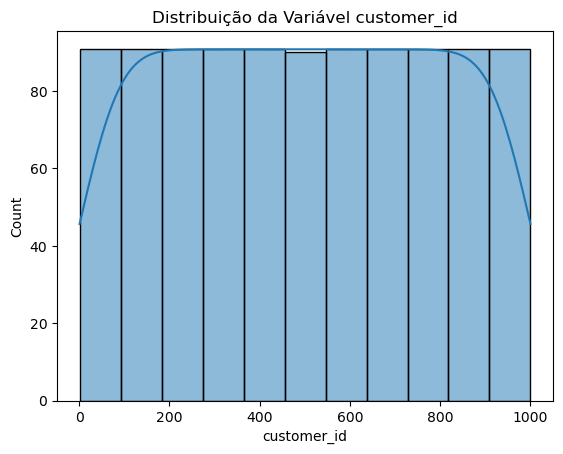


Análise da variável: city_id
count    1000.000000
mean       10.136000
std         5.895953
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: city_id, dtype: float64


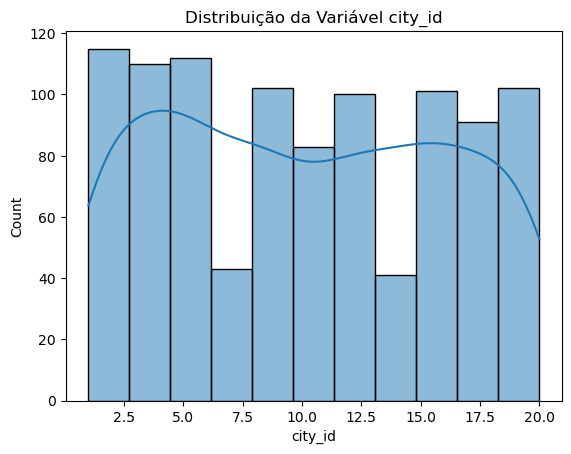


Análise da variável: gender_id
count    1000.000000
mean        1.491000
std         0.500169
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: gender_id, dtype: float64


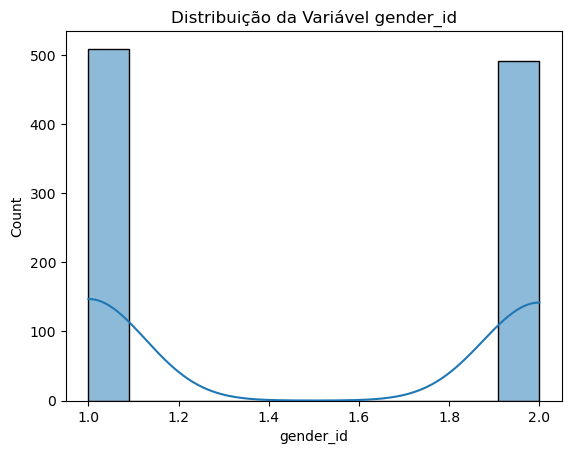

In [29]:
# 1.1 Análise de distribuição para variáveis numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nDistribuição das variáveis numéricas:")
for col in numeric_columns:
    print(f"\nAnálise da variável: {col}")
    print(df[col].describe())
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuição da Variável {col}')
    plt.show()

**Comentários:**

1. `customer_id`:
   *  **Distribuição:** A variável apresenta uma distribuição uniforme, com valores que variam de 1 a 1000. Essa uniformidade é esperada, já que é um identificador único para cada cliente.
   *  **Estatísticas:** A média (500,5) e a mediana (500,5) refletem um equilíbrio perfeito na distribuição dos ID's. A variância é baixa e compatível com o intervalo fixo dos ID's.
   *  **Observações:** Por ser uma variável categórica disfarçada como numérica, a sua principal utilidade é identificar registos, e ela não deve ser usada diretamente para análises quantitativas ou modelagem preditiva.

2. `city_id`:
   *  **Distribuição:** A distribuição dos ID's das cidades apresenta um leve equilíbrio, com frequências moderadamente semelhantes para diferentes cidades. Não existem evidências de concentração extrema em uma única cidade.
   *  **Estatísticas:** O ID varia entre 1 e 20 com média de 10,1. O desvio padrão é 5,89, indicando uma dispersão moderada.
   *  **Observações:** A variável pode ser usada para análises relacionadas à localização geográfica, como identificação de tendências regionais ou segmentação de clientes por cidade.
  
3.  `gender_id`:
   *  **Distribuição:** A variável apresenta uma distribuição binária clara, com quase o mesmo número de clientes para os géneros representados por 1 e 2.
   *  **Estatísticas:** A média (1,49) reflete o equilíbrio entre as categorias. O desvio padrão é de 0,5, como esperado em variáveis binárias.
   *  **Observações:** Essa variável é útil para análises demográficas e segmentação por género. Não apresenta anomalias ou inconsistências.

## 5. Matriz de Correlação para Variáveis Numéricas

O próximo passo é calcular e visualizar a matriz de correlação entre as variáveis numéricas do *dataset*. Este procedimento permite identificar relações lineares entre as variáveis, isso vai indicar se alguma delas possui dependência significativa.

Utilizamos a função `corr()` para obter os coeficientes de correlação e um mapa de calor para facilitar a interpretação visual dos resultados.

Este passo é importante para compreender a inter-relação entre os dados e orientar futuras análises.


Matriz de Correlação:
             customer_id   city_id  gender_id
customer_id     1.000000 -0.006677   0.048592
city_id        -0.006677  1.000000   0.005507
gender_id       0.048592  0.005507   1.000000


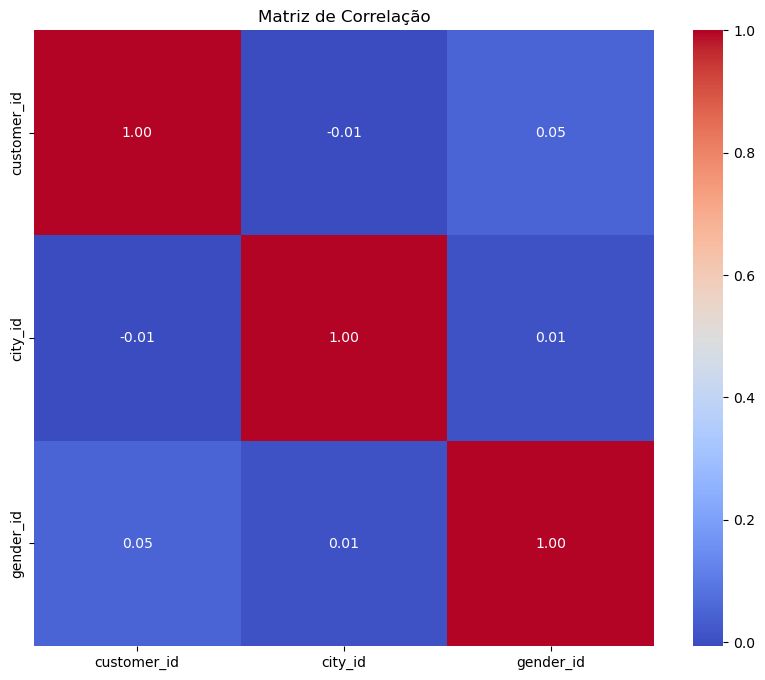

In [33]:
correlation_matrix = df[numeric_columns].corr()
print("\nMatriz de Correlação:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

**Comentários:**

1. **Interpretação Geral da Matriz de Correlação:**
   * A matriz de correlação apresenta os coeficientes de correlação entre as variáveis numéricas do nosso *dataset*.
   * A correlação varia entre -1 e 1:
     - Valores próximos de 1 indicam uma relação linear positiva forte;
     - Valores próximos de -1 indicam uma relação linear negativa forte;
     - Valores próximos de 0 indicam pouca ou nenhuma relação linear.

2. **Observações Específicas:**
   *  `customer_id` **vs** `city_id` **(-0.01):**
     - A correlação é praticamente inexistente. Isso é esperado, já que o `customer_id` é um identificador único e não reflete uma relação lógica com a localização do cliente.
   *  `customer_id` **vs** `gender_id` **(0.05)_:**
     - A correlação é muito baixa, o que indica que o identificador do cliente (`customer_id`) não tem influência direta sobre o género.
   * `city_id` **vs** `gender_id` **(0.01):**
     - A correlação é quase inexistente, isso sugere que não existe qualquer tipo de relação significativa entre o género dos clientes e as cidades onde os mesmos estão localizados.
    
3. **Conclusões:**
   *  A matriz de correlação confirma que as variáveis analisadas são majoritariamente independentes, o que é consistente com a natureza dos dados.

## 6. Verificar valores únicos para variáveis categóricas

Neste ponto, vamos analisar as variáveis categóricas do *dataset*, especificamente `city_id` e `gender_id`. O objetivo será identificar a quantidade de categorias únicas e a frequência de ocorrência de cada uma delas. Essa análise é essencial para entender a distribuição das categorias e verificar possíveis desbalanceamentos ou padrões relevantes que possam impactar as análises futuras.

Para isso, vamos realizar as seguintes etapas:

**Identificação dos valores únicos por variável categórica:**
*  Será calculado o número total de categorias únicas presentes em cada variável (`city_id`e `gender_id`).


**Visualização da distribuição das categorias:**
   *  Vamos criar gráficos de barras para ilustrar a frequência das categorias de forma mais clara e intuitiva.
   *  As categorias vão ser ordenadas pela frequência para facilitar a interpretação dos padrões.
  
Esta análise vai nos ajudar a compreender melhor a natureza e a distribuição das variáveis categóricas, vai fornecer uma base sólida para futuras análises e modelagens.


Valores únicos por variável categórica:

city_id: 20 valores únicos
city_id
1     67
5     64
3     58
15    57
8     57
Name: count, dtype: int64

gender_id: 2 valores únicos
gender_id
1    509
2    491
Name: count, dtype: int64


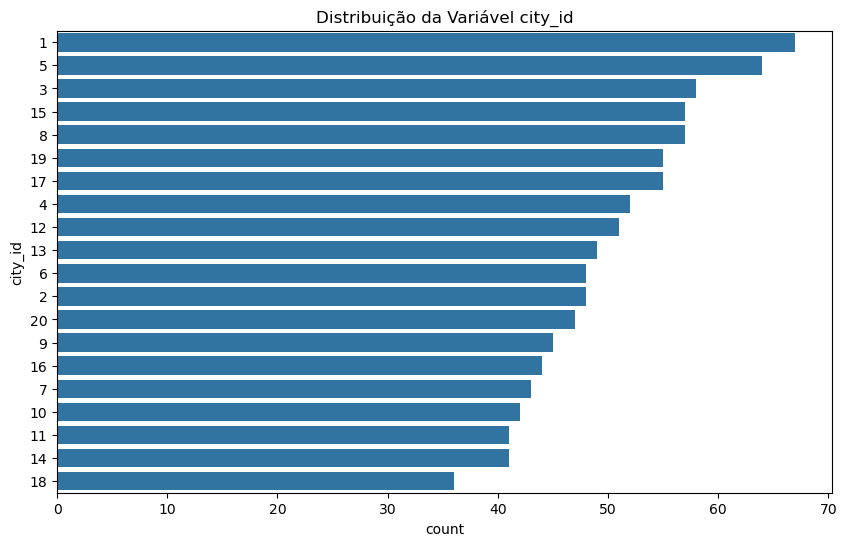

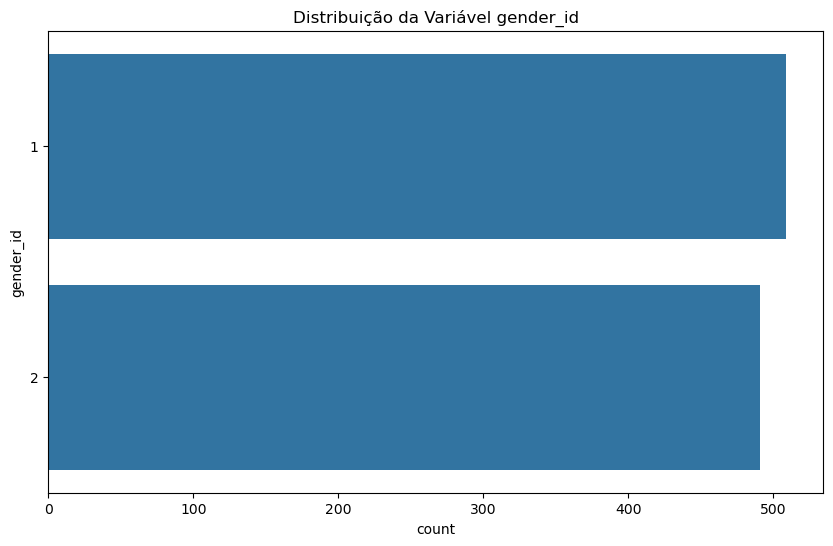

In [38]:
# Identificamos a distribuição de categorias em variáveis qualitativas, essencial para detectar desbalanceamento.
# Neste dataset, tratamos city_id e gender_id como variáveis categóricas.
categorical_columns = ['city_id', 'gender_id']
print("\nValores únicos por variável categórica:")
for col in categorical_columns:
    print(f"\n{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts().head())

# Visualizamos a frequência das categorias para melhor compreender sua distribuição.
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribuição da Variável {col}')
    plt.show()

**Comentários:**

1. `city_id`:
   * **Valores únicos:** Há 20 cidades diferentes no *dataset*.
   * **Distribuição:** A distribuição de `city_id` mostra uma leve variação na frequência de clientes entre as cidades. Algumas cidades, como a cidade identificada pelo ID 1, apresentam maior número de clientes (67), enquanto outras têm menos representatividade, como a cidade com o ID 14, com apenas 40 registos.
   * **Interpretação:** Essa variação pode inficar que algumas cidades têm maior concentração de clientes ou que o *dataset* reflete diferenças regionais na participação dos consumidores.

2. `gender_id`:
   * **Valores únicos:** Há 2 categorias únicas, representam os géneros identificados por 1 e 2.
   * **Distribuição:** A distribuição entre as duas categorias é equilibrada, com 509 registos para a categoria 1 e 491 para a categoria 2.
   * **Interpretação:** Esse equilíbrio sugere que não há um desbalanceamento significativo em relação ao género no *dataset*, o que é útil para análises que possam depender dessa variável.

## 7. Seleção Manual de Variáveis

Neste ponto, vamos focar na identificação e seleção das variáveis numéricas do *dataset* que serão utilizadas para as próximas análises e tarefas, como imputação de valores ausentes ou modelagem. Essa etapa é essencial para garantir que as variáveis escolhidas sejam compatíveis com os métodos analíticos a serem aplicados.

Iremos selecionar as variáveis com base no seu tipo (`float64` e `int64`), e vamos utilizar uma abordagem programática que vai filtrar colunas relevantes. Esta escolha assegura que apenas dados quantitativos sejam considerados, assim sendo, evita possíveis erros ou inconsistências durante os cálculos e análises posteriores.

Esta etapa prepara o *dataset* para ser utilizado em tarefas avançadas, e garante que as variáveis selecionadas estejam prontas para serem analisadas ou tratadas de forma adequada.

In [43]:
variaveis_selecionadas = numeric_columns
print("\nVariáveis selecionadas para imputação:")
print(variaveis_selecionadas)


Variáveis selecionadas para imputação:
Index(['customer_id', 'city_id', 'gender_id'], dtype='object')


In [45]:
# Criação de um novo DataFrame com apenas variáveis numéricas
df_selecionado = df[variaveis_selecionadas].copy()
print("\nDataset após seleção de variáveis numéricas:")
print(df_selecionado.head())


Dataset após seleção de variáveis numéricas:
   customer_id  city_id  gender_id
0            1        7          1
1            2       20          2
2            3       15          1
3            4       11          2
4            5        8          1


**Comentários:**

1. **Seleção das variáveis:**
   * Foram selecionadas as variáveis numéricas do *dataset* (`customer_id`, `city_id`, `gender_id`) com base no tipo de dados (`float64` e `int64`), que nos garante que apenas as colunas quantitativas vão ser incluídas para as análises subsequentes.
   * O processo foi realizado de forma automatizada, isso assegura a precisão na escolha das variáveis.
  
2. **Criação de um *DataFrame*:**
   * Criamos um novo *DataFrame* que contem exclusivamente as variáveis numéricas selecionadas, isso ajuda-nos a organizar os dados e a evitar potenciais erros ou inconsistências durante as próximas etapas.

3. **Organização e Preparação:**
   * O DataFrame resultante está limpo e pronto para utilizarmos com as tarefas analíticas.
   * Este passo acaba por ser crucial para garantir que as etapas posteriores sejam realizadas de forma eficiente e sem ruídos provenientes de variávies irrelevantes ou incompatíveis.

## 8. K-Means Clustering

Nesta etapa, vamos realizar uma análise de agrupamentos ao utilizarmos o algoritmo **K-Means Clustering**. O objetivo é identificar padrões ocultos e formar *clusters* de clientes com base nas variáveis numéricas selecionadas. Este tipo de análise é particularmente útil para segmentação de clientes, permite criar grupos com características semelhantes.

Os passos a seguir serão os seguintes:
1. **Normalização dos Dados;**
2. **Execução do K-Means;**
3. **Visualização dos Resultados.**

Esta análise permitirá obter *insights* iniciais sobre a segmentação dos clientes e estabelecer a base para uma exploração mais detalhada dos grupos identificados.
A combinação do *Método Elbow* e da *Pontuação de Silhueta* vai ajudar a determinar o valor ótimo de *K* para o agrupamento.


Executando K-Means Clustering para análise de agrupamentos...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

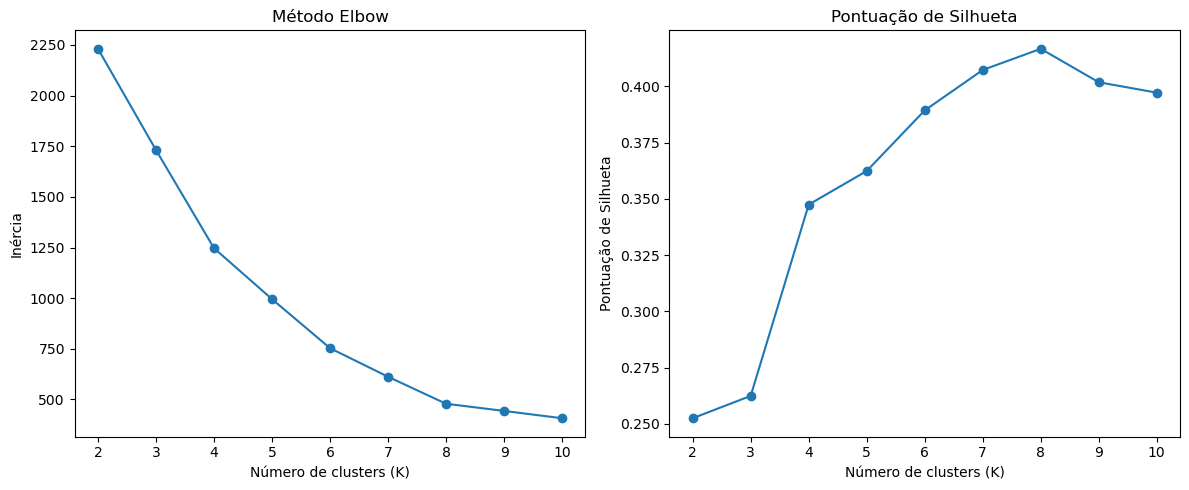

In [50]:
print("\nExecutando K-Means Clustering para análise de agrupamentos...")
inertia = []
silhouette_scores = []

# Normalizar os dados para clustering
scaled_features = (df_selecionado - df_selecionado.mean()) / df_selecionado.std()

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    
    inertia.append(kmeans.inertia_)
    
    # Calcular Silhouette Score
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plotar o Método Elbow e os Scores de Silhueta
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Pontuação de Silhueta')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Pontuação de Silhueta')

plt.tight_layout()
plt.show()

**Comentários:**

1. **Método Elbow:**
   * O gráfico do *Método Elbow* demonstra uma diminuição acentuada da inércia para valores iniciais de *K*, com uma estabilização gradual conforme o número de *clusters* aumenta.
   * O ponto de inflexão mais evidente sugere que *K* entre 4 e 6 pode ser uma boa escolha para a divisão dos dados, dado que a redução da inércia começa a apresentar ganhos marginais a partir desses valores.

2. **Pontuação de Silhueta:**
   * A *Pontuação de Silhueta* mostra um aumento contínuo até **K = 7**, atinge o seu máximo em **K = 8**, que indica uma ótima separação entre *clusters* nesse ponto.
   * Após **K = 7**, a pontuação começa a estabilizar, o que sugere que valores maiores de *K* oferecem pouca ou nenhuma melhoria na qualidade dos *clusters*.
3. **Interpretação Geral:**
   * O *Método Elbow* e a *Pontuação de Silhueta* fornecem direções ligeiramente diferentes, o que é comum em análises de *clustering*. Enquanto o *Elbow* sugere simplicidade com *K* mais baixo, a *Silhueta* prioriza a separação de *clusters* com *K* mais elevado.
   * A escolha ideal de *K* deve considerar não apenas os números recomendados por estas métricas, mas também a aplicabilidade prática e a interpretação dos *clusters* formados.

Estas observações estabelecem a base para avançar na validação e refinamento do valor de *K*, ao serem utilizadas tanto métricas quantitativas quanto qualitativas.

## 9. Introdução de Valores Ausentes

Nesta etapa, vamos simular a existência de valores ausentes no *dataset* selecionado para avaliar e testar métodos de imputação posteriormente. A introdução de valores ausentes é feita de forma controlada e aleatória, seguindo um determinado percentual em todas as variáveis.

**O que será feito:**
1. Vamos introduzir uma proporção de 20% de valores ausentes (`missing_rate` = 0.2) em cada uma das variáveis selecionadas.
2. Para cada coluna, serão escolhidos índices aleatórios onde os valores serão substituídos por `NaN` (*Not a Number*), que vai simular os dados ausentes.
3. Após a introdução dos valores ausentes, será verificada a distribuição de valores nulos em cada variável, isso vai garantir que a proporção especificada seja aplicada corretamente.

Esta etapa é fundamental para criar um cenário realista em que a imputação de dados poderá ser avaliada em termos de eficácia e impacto nos resultados subsequentes.

In [55]:
np.random.seed(42)
missing_rate = 0.2
for col in df_selecionado.columns:
    n_missing = int(missing_rate * len(df_selecionado))
    missing_indices = np.random.choice(df_selecionado.index, n_missing, replace=False)
    df_selecionado.loc[missing_indices, col] = np.nan

print("\nDataset após introdução de valores ausentes:")
print(df_selecionado.isnull().sum())


Dataset após introdução de valores ausentes:
customer_id    200
city_id        200
gender_id      200
dtype: int64


**Comentários:**

**Proporção de Valores Ausentes:**
   * A introdução de 20% de valores ausentes foi aplicada uniformemente em todas as variáveis (`customer_id`, `city_id`, `gender_id`).
   * O número de valores ausentes por coluna é consistente (200 valores ausentes por variável), que confirma a aplicação correta da proporção definida.

**Distribuição Aleatória:**
   * Os valores ausentes foram distribuídos de forma aleatória, o que simula cenários reais em que dados podem estar indisponíveis devido a falhas na recolha de dados ou outras razões.

**Preparação para Imputação:**
   * Este processo cria um ambiente controlado que permitirá testar e comparar métodos de imputação, como o *KNN Imputer*, que avalia a capacidade de recuperar os dados de forma precisa.

**Validação:**
   * Foi garantido que apenas os valores das variáveis numéricas foram alterados, preservando a estrutura original do *dataset* e permitindo análises consistentes nos passos seguintes.

## 10. Testagem de Vários Valores de *K*

Nesta etapa, vamos testar diferentes valores de *K* no algoritmo *KNN Imputer* para avaliar a eficácia da imputação de dados. O objetivo é identificar o valor de *K* que minimiza os erros ao recuperar valores ausentes, e garante a precisão dos dados imputados em relação aos valores originais.

**O que será feito:**
1. **Definição dos Valores de *K*:**
   * Serão testados os valores de **K = [2,3,5,8,10]**, vai variar a quantidade de vizinhos considerados pelo algoritmo para imputação.

2. **Cálculo dos Erros:**
   * Dois tipos de erro serão calculados para cada valor de *K*: O **Erro Quadrático Médio (MSE)** que mede a magnitude média dos erros ao quadrado e o **Erro Médio Absoluto (MAE)** que mede a magnitude média dos erros absolutos, é menos sensível a *outliers*.
   * Estes erros serão utilizados para comparar os valores imputados com os dados originais (antes de remover os valores ausentes).

3. **Preparação dos Dados para Comparação:**
   * Antes de calcular os erros, os dados originais e imputados serão alinhados e processados para garantir consistência nos tipos e índices.

4. **Resultados:**
   * Os erros calculados para cada *K* serão apresentados, permitindo identificar o valor de *K* que oferece o melhor equilíbrio entre simplicidade e precisão na imputação.

In [60]:
# Testar diferentes valores de K para a imputação
erros_mse = []
erros_mae = []
valores_k = [2, 3, 5, 8, 10]

df_original_sem_omissos = df[variaveis_selecionadas].dropna()  # Dados originais sem valores ausentes

def preparar_dados_para_comparacao(df_original, df_imputado):
    """Prepara os DataFrames para comparação, garantindo tipos consistentes e alinhamento."""
    df_original = df_original.reset_index(drop=True)
    df_imputado = df_imputado.reset_index(drop=True)
    return df_original, df_imputado

for k in valores_k:
    imputer = KNNImputer(n_neighbors=k)
    df_imputado = pd.DataFrame(imputer.fit_transform(df_selecionado), columns=variaveis_selecionadas)

    # Garantir alinhamento e consistência dos tipos de dados
    df_original, df_imputado = preparar_dados_para_comparacao(df_original_sem_omissos, df_imputado)

    # Comparar com os dados originais (antes de remover os valores)
    mse = mean_squared_error(df_original, df_imputado)
    mae = mean_absolute_error(df_original, df_imputado)
    erros_mse.append(mse)
    erros_mae.append(mae)
    print(f"K={k}: MSE={mse}, MAE={mae}")

K=2: MSE=21098.763585822915, MAE=32.66879166666667
K=3: MSE=20760.249576563656, MAE=32.35084722222222
K=5: MSE=5939.739582489584, MAE=17.60235833333334
K=8: MSE=5588.0783774895835, MAE=17.232625000000002
K=10: MSE=5594.26067915625, MAE=17.076191666666663


**Comentários:**

**Comportamento Geral:**
* Observa-se que os erros (*MSE* e *MAE*) diminuem consistentemente à medida que *K* aumenta, que nos indica uma melhor aproximação dos dados imputados em relação aos dados originais.
* A escolha de *K* deve equilibrar precisão (menor erro) e simplicidade computacional (valor menor de *K*).

**Impacto dos Valores de *K*:**
* Valores menores de *K* (como **K = 2**) podem ser mais suscetíveis a variações locais nos dados, resultando em maiores erros.
* Valores maiores de *K* (como **K = 8** ou **K = 10**) consideram mais vizinhos e oferecem imputações mais estáveis, reduzindo os erros.

**Validação:**
* Os erros calculados fornecem uma métrica quantitativa objetiva para escolher o *K* ideal.
* No entanto, a escolha final do *K* deve também considerar a natureza do *dataset* e o impacto nos resultados subsequentes.

Este processo estabelece uma base sólida para decidir o melhor valor de *K*, otimiza a imputação de valores ausentes e garante a fiabilidade dos dados recuperados.

## 11. Avaliação de Desempenho e Discussão

Nesta etapa final, vamos analisar os resultados obtidos com os diferentes valores de *K* testados no *KNN Imputer*, avaliando os erros médios calculados (*MSE* e *MAE*) para determinar o melhor *K*. Esta análise permitirá compreender como a escolha do número de vizinhos (*K*) influencia a imputação de valores ausentes no *dataset*.

**O que será feito:**
1. **Visualização dos Erros**
2. **Identificação do Melhor *K***
3. **Discussão**, onde vamos discutir os resultados obtidos.

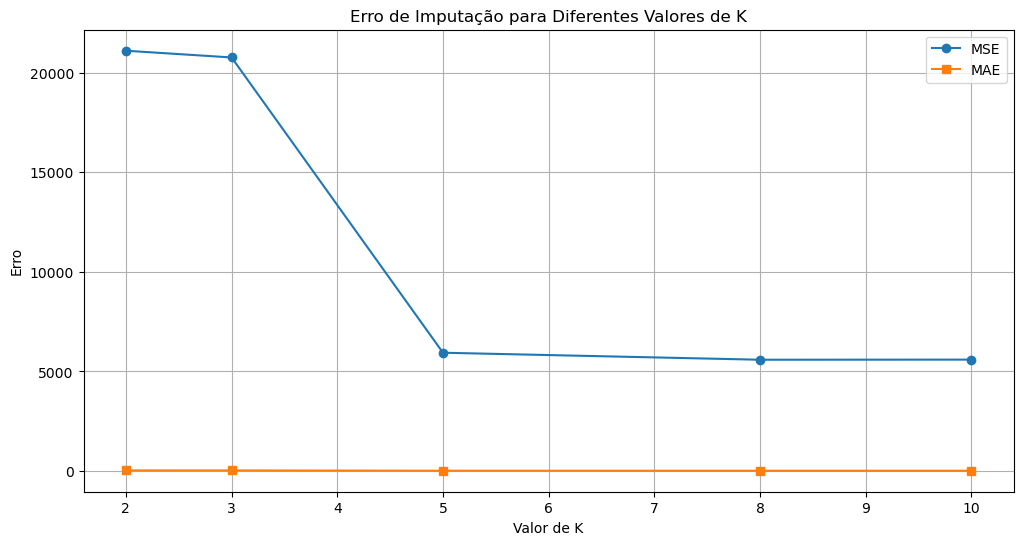

Melhor valor de K (MSE): 8 com MSE=5588.0783774895835
Melhor valor de K (MAE): 10 com MAE=17.076191666666663


In [65]:
# Plotar os erros MSE e MAE para diferentes valores de K
plt.figure(figsize=(12, 6))

plt.plot(valores_k, erros_mse, marker='o', label='MSE')
plt.plot(valores_k, erros_mae, marker='s', label='MAE')
plt.xlabel('Valor de K')
plt.ylabel('Erro')
plt.title('Erro de Imputação para Diferentes Valores de K')
plt.legend()
plt.grid()
plt.show()

# Determinar o melhor K com base no menor MSE e MAE
melhor_k_mse = valores_k[np.argmin(erros_mse)]
melhor_k_mae = valores_k[np.argmin(erros_mae)]
print(f"Melhor valor de K (MSE): {melhor_k_mse} com MSE={min(erros_mse)}")
print(f"Melhor valor de K (MAE): {melhor_k_mae} com MAE={min(erros_mae)}")

# Discussão e Conclusão:
# - Use os resultados obtidos para justificar qual valor de K é mais apropriado
# - Comente sobre como os valores ausentes influenciam a imputação
# - Analise como o K escolhido impacta no desempenho geral do algoritmo

**Comentários:**

**Comportamento dos Erros:**
* O gráfico mostra uma redução consistente dos valores de *MSE* e *MAE* à medida que *K* aumenta.
* O *MSE* atinge o seu valor mínimo em **K = 8**, enquanto o *MAE* é minimizado em **K = 10**. Isto reflete uma ligeira diferença nas métricas quanto ao melhor valor de *K*.

**Escolha do Melhor *K*:**
* Dependendo do objetivo da análise, os melhores valores de *K* são:
  - **K = 8:** Minimiza o *MSE*, o que é ideal quando o foco está em reduzir grandes desvios (*outliers*) nos dados imputados.
  - **K = 10:** Minimiza o *MAE*, o que é mais adequado para análises que priorizam uma precisão média consistente sem grande impacto de *outliers*.
* A decisão sobre o *K* ideal deve ser orientada pelo contexto da análise:
  - Se a análise for sensível a grandes desvios, priorizar **K = 8**.
  - Se o objetivo for minimizar os erros absolutos médios de forma geral, **K = 10** pode ser mais apropriado.

**Impacto dos Valores Ausentes:**
* A introdução de valores ausentes influenciou o desempenho da imputação, com *K* mais elevados a oferecerem maior estabilidade na recuperação dos dados.
* Contudo, valores de *K* muito elevados podem suavizar demasiado os dados, diluindo diferenças importantes.

**Conclusão:**
* Os resultados confirmam que a escolha de *K* é crucial para otimizar a imputação. Valores de *K* baixos podem ser mais influenciados por variações locais, enquanto valores maiores oferecem maior estabilidade, mas com risco de suavização excessiva.
* A decisão final sobre o *K* ideal deve alinhar-se aos objetivos específicos da análise e à natureza dos dados, equilibrando simplicidade, precisão e robustez face a *outliers*.

Assim encerramos o processod e imputação, com uma base sólida para justificar a escolha de *K* e avaliar o impacto da imputação na qualidade dos dados e nas análises futuras.